In [17]:
#Import
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import json
import time

file = "Resources/consolidated_coin_data.csv"
CCD = pd.read_csv(file)

#Convert Date to Date, find the Max Common Date (MaxCD) and Minimum Common Date (MinCD), Splice dataset by MinCD and MaxCD


CCD["Date"] = pd.to_datetime(CCD["Date"])

MaxCleaner = (CCD.groupby("Currency").max())
MaxCD= MaxCleaner["Date"].min()
MinCleaner = (CCD.groupby("Currency").min())
MinCD= MinCleaner["Date"].max()

CCD = CCD.loc[CCD["Date"] >= MinCD]
CCD = CCD.loc[CCD["Date"] <= MaxCD]

#Convert Dates to numeric values
CCD["Date"] = pd.to_numeric(CCD["Date"])
ls = []
CCD = CCD.reset_index()
del CCD["index"]

#loop through dates, divide by ridiculous large number to get seconds,add 1/1/1970 (25569) to get consistent dates
#use ctime to get date string, then split date string, return Day of Week
for x in range(CCD.index.size):
    a = (CCD["Date"].loc[x]/1000000000+25569)
    b = time.ctime(a)
    c = b.split(" ")
    d = c[0]
    ls.append(d)

# Return Date to date format, enter Day of Week into Dataframe
CCD["Date"] = pd.to_datetime(CCD["Date"])
CCD["Day"] = ls

#Make new df, just because... feels cleaner, splice by day of week.
WKC = CCD.copy()
WKC = WKC.loc[WKC["Day"] == "Mon"]
WKC = WKC.reset_index()
del WKC["index"]

WKC

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Day
0,ripple,2019-04-22,0.322277,0.329350,0.320237,0.323934,"1,131,094,080","13,606,823,301",Mon
1,ripple,2019-04-15,0.328841,0.331551,0.318090,0.320913,"934,107,164","13,468,978,197",Mon
2,ripple,2019-04-08,0.361143,0.367036,0.351588,0.358234,"1,513,421,926","14,971,342,083",Mon
3,ripple,2019-04-01,0.309195,0.313777,0.308910,0.312747,"836,123,225","13,043,585,711",Mon
4,ripple,2019-03-25,0.309446,0.309736,0.301453,0.304055,"750,245,385","12,681,109,120",Mon
5,ripple,2019-03-18,0.317716,0.320667,0.314653,0.317440,"692,176,696","13,152,224,850",Mon
6,ripple,2019-03-11,0.313175,0.314576,0.309417,0.311065,"671,951,311","12,888,076,063",Mon
7,ripple,2019-03-04,0.312021,0.313120,0.302677,0.305133,"647,905,632","12,642,316,836",Mon
8,ripple,2019-02-25,0.300708,0.337855,0.300708,0.328510,"1,060,838,440","13,589,015,145",Mon
9,ripple,2019-02-18,0.303084,0.327739,0.302557,0.321568,"887,187,377","13,251,207,947",Mon


['ripple' 'binance-coin' 'eos' 'bitcoin' 'tether' 'bitcoin-cash' 'stellar'
 'litecoin' 'ethereum' 'cardano']


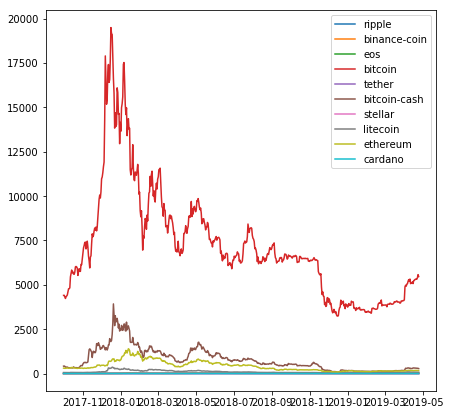

In [15]:
PC_plt = WKC.copy()

handles = []

PC_plt = CCD[["Currency", "Date","Close"]]
CC_ls = PC_plt["Currency"].unique()
print(CC_ls)

plt.figure(figsize=(7,7))

x_axis = PC_plt["Date"].unique()

for x in CC_ls:
    y_axis = PC_plt["Close"].loc[PC_plt["Currency"] == x]
    x, = plt.plot(x_axis,y_axis, label = x)
    handles.append(x)
    
plt.legend(handles = handles, loc = "best")
plt.show()

['ripple' 'binance-coin' 'eos' 'bitcoin' 'tether' 'bitcoin-cash' 'stellar'
 'litecoin' 'ethereum' 'cardano']


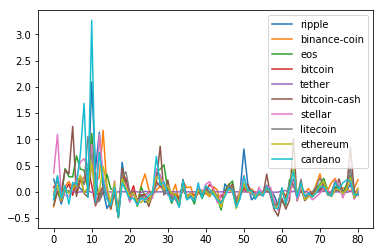

In [16]:
PC_pt = WKC.copy()

CC_ls = PC_pt["Currency"].unique()
print(CC_ls)

PC_pt = PC_pt.rename(columns={"Close" : "Pct"})


PC_pt = PC_pt.pivot_table(values="Pct",index = "Date", columns = "Currency").pct_change().reset_index()

PC_pt = PC_pt.dropna(how="any")
r1 = len(PC_pt["Date"].unique())
x_axis = np.arange(r1)

PC_pt

for x in CC_ls:

    y_axis = PC_pt[x]
    x, = plt.plot(x_axis, y_axis, label = x)
    
plt.legend(loc = "best")
plt.show()

In [ ]:
#Ignore, just experimenting with ANOVA testing + other codes and odd ends
# PC_pt["Pct"] = PC_pt["Close"].pct_change()

# results = []
# for x in CC_ls:
#     a = PC_pt[PC_pt["Currency"] == x]["Pct"]
#     results.append(a)

# comp = [y for y in results]
# print(comp)
# stats.f_oneway(comp)